In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.0001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'mean_square_error', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 4000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

	2.1519662905531582
itr 3597
Iteration 3597/4000: 	2.1519700288654064
itr 3598
Iteration 3598/4000: 	2.1519738206590504
itr 3599
Iteration 3599/4000: 	2.151977595783279
itr 3600
Iteration 3600/4000: 	2.151981391955055
itr 3601
Iteration 3601/4000: 	2.1519849730990543
itr 3602
Iteration 3602/4000: 	2.1519885407012733
itr 3603
Iteration 3603/4000: 	2.1519921721835535
itr 3604
Iteration 3604/4000: 	2.151995755821309
itr 3605
Iteration 3605/4000: 	2.1519993466855034
itr 3606
Iteration 3606/4000: 	2.1520029286582747
itr 3607
Iteration 3607/4000: 	2.1520065336693475
itr 3608
Iteration 3608/4000: 	2.1520101367950164
itr 3609
Iteration 3609/4000: 	2.1520137175465566
itr 3610
Iteration 3610/4000: 	2.1520173115649572
itr 3611
Iteration 3611/4000: 	2.1520208930674958
itr 3612
Iteration 3612/4000: 	2.1520245016725106
itr 3613
Iteration 3613/4000: 	2.15202812609225
itr 3614
Iteration 3614/4000: 	2.152031700673978
itr 3615
Iteration 3615/4000: 	2.1520352944587136
itr 3616
Iteration 3616/4000: 	2.152

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

16218234, 2.148953234329347, 2.1489593918074252, 2.148965588615353, 2.1489717532131403, 2.1489779403500515, 2.148984084934407, 2.148990314023803, 2.148996481253865, 2.1490026579316304, 2.149008852441605, 2.1490150340185106, 2.1490212497977015, 2.1490274222831136, 2.1490336251020077, 2.1490398145161667, 2.149046002348912, 2.1490521976755477, 2.1490584027190116, 2.1490645972377083, 2.149070803569755, 2.1490769971552037, 2.149083212584985, 2.1490894486068703, 2.149095647459489, 2.1491018514952884, 2.1491077432631918, 2.149113690938307, 2.149119597435218, 2.149125481721877, 2.1491314090533082, 2.1491373086205816, 2.1491432150192047, 2.1491491251616544, 2.149155044244307, 2.1491609498673596, 2.1491668905101005, 2.1491727915324232, 2.149178702894112, 2.149184631772071, 2.149190595005898, 2.1491964802072263, 2.149202430788021, 2.1492083383383593, 2.1492142650308526, 2.149220231237368, 2.1492261173697638, 2.149232061226828, 2.149238009585192, 2.1492439331800655, 2.1492498852529844, 2.149255817

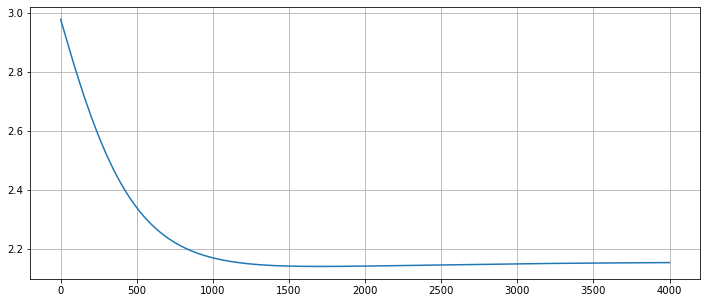

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.567958  ]
 [0.22580014]
 [0.20624189]]
[1. 0. 0.] <-> [[0.47307855]
 [0.18028738]
 [0.34663412]]
[1. 0. 0.] <-> [[0.4642008 ]
 [0.17853138]
 [0.35726786]]
[1. 0. 0.] <-> [[0.3579064 ]
 [0.15622859]
 [0.48586494]]
[1. 0. 0.] <-> [[0.40274563]
 [0.16607861]
 [0.4311757 ]]
[1. 0. 0.] <-> [[0.44881442]
 [0.17548375]
 [0.37570184]]
[1. 0. 0.] <-> [[0.54654485]
 [0.18829058]
 [0.26516455]]
[1. 0. 0.] <-> [[0.4283583 ]
 [0.17138866]
 [0.4002531 ]]
[1. 0. 0.] <-> [[0.4325595 ]
 [0.17223783]
 [0.39520267]]
[1. 0. 0.] <-> [[0.4831454 ]
 [0.18217166]
 [0.33468294]]
[1. 0. 0.] <-> [[0.431407  ]
 [0.17200536]
 [0.3965876 ]]
[0. 1. 0.] <-> [[0.3688905 ]
 [0.3854447 ]
 [0.24566478]]
[0. 0. 1.] <-> [[0.5809118 ]
 [0.20721936]
 [0.21186882]]
[1. 0. 0.] <-> [[0.5384961 ]
 [0.1872074 ]
 [0.27429646]]
[1. 0. 0.] <-> [[0.52085245]
 [0.18519942]
 [0.29394817]]
[0. 1. 0.] <-> [[0.5022344 ]
 [0.18402901]
 [0.31373665]]
[1. 0. 0.] <-> [[0.46675324]
 [0.17903724]
 [0.3542095 ]]
[1. 0. 0.] <->